In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Analyze the data:

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

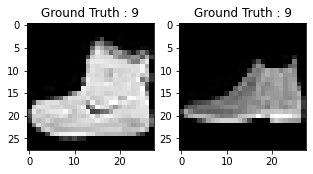

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Data Pre-processing:

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#Model

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
fashion_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [16]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 21s 15ms/step - loss: 0.4532 - accuracy: 0.8353 - val_loss: 0.3294 - val_accuracy: 0.8789
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2833 - accuracy: 0.8960 - val_loss: 0.2595 - val_accuracy: 0.9048
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2396 - accuracy: 0.9122 - val_loss: 0.2447 - val_accuracy: 0.9124
Epoch 4/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2051 - accuracy: 0.9238 - val_loss: 0.2387 - val_accuracy: 0.9139
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 0.1807 - accuracy: 0.9330 - val_loss: 0.2247 - val_accuracy: 0.9190
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.1573 - accuracy: 0.9416 - val_loss: 0.2232 - val_accuracy: 0.9227
Epoch 7/20
750/750 [==============================] - 11s 15ms/step - loss: 0.1383 - accuracy: 0.9480 - val_loss: 0.2511 - val_accuracy:

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4479568898677826
Test accuracy: 0.9157999753952026


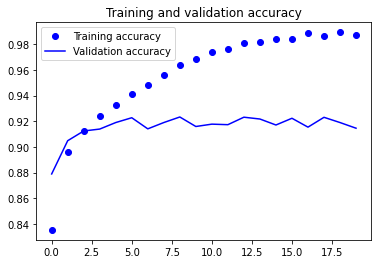

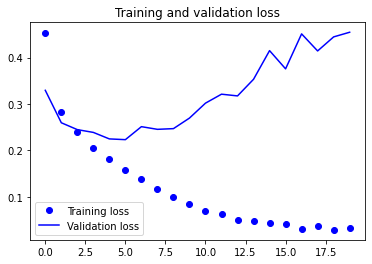

In [21]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Add Dropout:

In [22]:
batch_size = 64
epochs = 20
num_classes = 10

In [23]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [24]:
fashion_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [25]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 13s 16ms/step - loss: 0.5961 - accuracy: 0.7783 - val_loss: 0.3759 - val_accuracy: 0.8637
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3768 - accuracy: 0.8615 - val_loss: 0.3108 - val_accuracy: 0.8863
Epoch 3/20
750/750 [==============================] - 12s 15ms/step - loss: 0.3277 - accuracy: 0.8791 - val_loss: 0.2794 - val_accuracy: 0.8967
Epoch 4/20
750/750 [==============================] - 12s 15ms/step - loss: 0.2976 - accuracy: 0.8911 - val_loss: 0.2512 - val_accuracy: 0.9053
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2802 - accuracy: 0.8963 - val_loss: 0.2486 - val_accuracy: 0.9079
Epoch 6/20
750/750 [==============================] - 12s 15ms/step - loss: 0.2665 - accuracy: 0.9013 - val_loss: 0.2359 - val_accuracy: 0.9111
Epoch 7/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2570 - accuracy: 0.9044 - val_loss: 0.2234 - val_accuracy:

In [26]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


Model Evaluation on Test Dataset:

In [27]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.2208 - accuracy: 0.9187


In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22077451646327972
Test accuracy: 0.9186999797821045


Plotting Loss and Accuracy Curves:

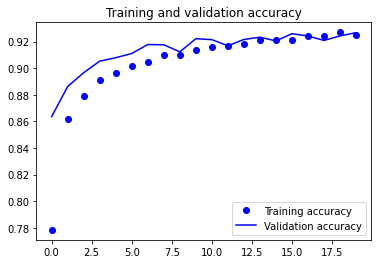

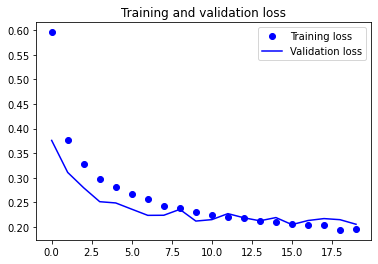

In [29]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Predict Lables:

In [40]:
predicted_classes = fashion_model.predict(test_X)

In [41]:
predicted_classes

array([[8.24009350e-12, 9.66360238e-13, 2.30537499e-14, ...,
        2.14917191e-06, 1.08233709e-14, 9.99997616e-01],
       [7.62604486e-07, 6.35478168e-15, 9.99998689e-01, ...,
        1.16068268e-15, 1.00318289e-12, 3.25719024e-15],
       [1.05879938e-13, 1.00000000e+00, 1.97521256e-14, ...,
        7.47764054e-22, 7.31305906e-16, 1.99145115e-19],
       ...,
       [9.66359770e-11, 3.87603666e-14, 4.01738365e-11, ...,
        4.87405289e-14, 1.00000000e+00, 8.69381661e-13],
       [1.64236028e-10, 1.00000000e+00, 1.59503952e-10, ...,
        4.73826578e-16, 1.33691079e-11, 2.62687279e-14],
       [5.00981150e-06, 1.15874215e-07, 4.28054864e-06, ...,
        2.18285382e-01, 7.90126942e-05, 1.19213924e-04]], dtype=float32)

In [42]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9150 correct labels


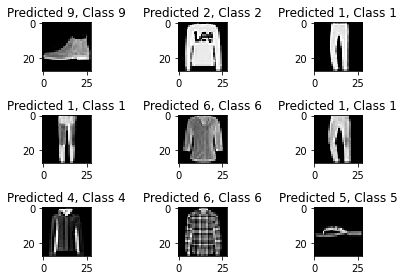

In [45]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 850 incorrect labels


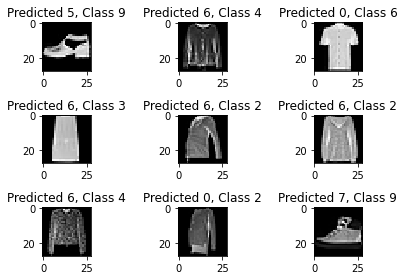

In [46]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [47]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.90      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.88      0.87      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.91      0.81      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.79      0.74      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000

